<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/GaussianClustering/EM_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> The objective of this project is to understand the Expectation-Maximization algorithm and learn how to apply it in practical scenarios.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import mixture
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import metrics
import pandas as pd

In [ ]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)
mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

In [ ]:
def pr_single_comp(mu, sigma, x):
  prob = []
  for i in range(0, x.shape[0]):
    prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma)
  return prob

def pr_single_normalized(mu,sigma, x):
  unnorm_prob = pr_single_comp(mu, sigma, x)
  normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1)
  prob = []
  for i in range(0, len(unnorm_prob)) :
    prob.append(unnorm_prob[:][i]/normalization[i])
  return prob

def update_mu(x,mu,sigma) :
  prob = pr_single_normalized(mu,sigma,x)
  hat_mu = [0, 0]
  for i in range(0, len(prob)) :
    hat_mu = hat_mu + prob[i][:]*x[i,]
  hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
  return hat_mu


def update_sigma(x,mu,sigma) :
  prob = pr_single_normalized(mu,sigma,x)
  hat_sigma = [0, 0]
  for i in range(0, len(prob)) :
    hat_sigma = hat_sigma + prob[i][:]*(x[i,] - mu)**2
  hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
  return hat_sigma


mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
sigma_old = [0.3, 0.3]
NbIter = 10


# Learning procedure (optimization)
for iter in range(1, NbIter):
  hat_mu = update_mu(data,mu_old,sigma_old)
  hat_sigma = update_sigma(data,mu_old,sigma_old)
  print('iter', iter)
  print('updated mu = ',hat_mu)
  print('updated sigma = ',hat_sigma)
  mu_old = hat_mu
  sigma_old = hat_sigma + 1e-13

iter 1
updated mu =  [-0.01593619  1.96738275]
updated sigma =  [0.334036   0.25928225]
iter 2
updated mu =  [-0.01331995  1.9703084 ]
updated sigma =  [0.09243455 0.08996396]
iter 3
updated mu =  [-0.02109555  1.96357731]
updated sigma =  [0.08482993 0.09549934]
iter 4
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]
iter 5
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]
iter 6
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]
iter 7
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]
iter 8
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]
iter 9
updated mu =  [-0.02109557  1.9635773 ]
updated sigma =  [0.08476945 0.09545404]


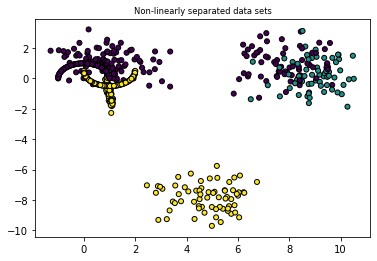

In [ ]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [ ]:
def pr_single_comp2d(mu, sigma, x):
  prob = []
  mu1=mu[0]
  mu2=mu[1]
  sigma1=sigma[0]
  sigma2=sigma[1]
  for i in range(0, x.shape[0]):
    prob1=np.exp(-0.5*((x[i,]-mu1).dot(np.linalg.inv(sigma1)).dot((x[i,]-mu1))))/np.linalg.det(sigma1)
    prob2=np.exp(-0.5*((x[i,]-mu2).dot(np.linalg.inv(sigma2)).dot((x[i,]-mu2))))/np.linalg.det(sigma2)
    prob.append([prob1,prob2])
  return prob

def pr_single_normalized2d(mu,sigma, x):
  unnorm_prob = pr_single_comp2d(mu, sigma, x)
  normalization = np.sum(unnorm_prob, axis=1)
  prob = []
  for i in range(0, len(unnorm_prob)) :
    prob.append(unnorm_prob[:][i]/normalization[i])
  return prob

def update_mu2d(x,mu,sigma) :
  prob = pr_single_normalized2d(mu,sigma,x)
  hat_mu = np.array([[0,0], [0,0]])
  for i in range(0, len(prob)):
    hat_mu = hat_mu + [j*x[i,] for j in prob[i][:]]
  hat_mu = hat_mu/np.sum(prob, axis=0)
  return hat_mu

def update_sigma2d(x,mu,sigma) :
  prob = pr_single_normalized2d(mu,sigma,x)
  hat_sigma = np.array([[[0,0],[0,0]],[[0,0],[0,0]]])
  for i in range(0, len(prob)) :
    hat_sigma = hat_sigma + [j*(x[i,] - mu).dot((x[i,] - mu)) for j in prob[i][:]]
  hat_sigma = hat_sigma/np.sum(prob, axis=0)
  return hat_sigma

In [ ]:
mu_old = np.random.uniform(-2,2,size=(2,2))
#sigma_old = [[[.05,.1],[0.14,.07]],[[.12,.02],[.22,.11]]]
sigma_old = [[[.5,1],[0.5,.75]],[[1,2],[2,1]]]
NbIter = 10


# Learning procedure (optimization)
for iter in range(1, NbIter):
  hat_mu = update_mu2d(X2,mu_old,sigma_old)
  hat_sigma = update_sigma2d(X2,mu_old,sigma_old)
  print('iter', iter)
  print('updated mu = ',hat_mu)
  print('updated sigma = ',hat_sigma)
  mu_old = hat_mu
  sigma_old = hat_sigma + 1e-13

In [ ]:
def bestGM(X):
  lowest_bic = np.infty
  bic = []
  n_components_range = range(1, 5)
  cv_types = ['spherical', 'tied', 'diag', 'full']
  for cv_type in cv_types:
    for n_components in n_components_range:
      # Fit a Gaussian mixture with EM
      gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
      gmm.fit(X)
      bic.append(gmm.bic(X))
      if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm
  y_predicted = best_gmm.predict(X)
  return y_predicted

In [ ]:
print("homogenity Score for X1 :",metrics.homogeneity_score(bestGM(X1),Y1))
print("homogenity Score for X2 :",metrics.homogeneity_score(bestGM(X2),Y2))
print("homogenity Score for X3 :",metrics.homogeneity_score(bestGM(X3),Y3))

homogenity Score for X1 : 0.9596005177968417
homogenity Score for X2 : 1.0
homogenity Score for X3 : 0.5023619203781766


In [ ]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
breast_data=pd.read_csv(url,header=None)

breast_cancer_X=breast_data.drop([0,1],axis=1)
breast_cancer_Y=breast_data[1]

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
mice_data = pd.read_excel(url,'Hoja1')

mice_data_X=mice_data.drop(['MouseID','Genotype','Treatment','Behavior','class'],axis=1)
mice_data_Y=mice_data['class']

#fill missing values
mice_data_X=mice_data_X.fillna(value=mice_data_X.mean(axis=0).to_dict())

In [ ]:
print("homogenity Score for breast_cancer :",metrics.homogeneity_score(bestGM(breast_cancer_X),breast_cancer_Y))
print("homogenity Score for mice_data :",metrics.homogeneity_score(bestGM(mice_data_X),mice_data_Y))


homogenity Score for breast_cancer : 0.7092182790386102
homogenity Score for mice_data : 0.320795994662363
